### Imports & Load Cleaned Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load cleaned files
hr_df = pd.read_csv(r"processed/hr_clean.csv")
job_df = pd.read_csv(r"processed/job_descriptions_clean.csv")
reviews_df = pd.read_csv(r"processed/employee_reviews_clean.csv")
resumes_df = pd.read_csv(r"processed/resumes_clean.csv")

hr_df.head(), job_df.head(), reviews_df.head(), resumes_df.head()


(   Age Attrition     BusinessTravel  DailyRate              Department  \
 0   41       Yes      Travel_Rarely       1102                   Sales   
 1   49        No  Travel_Frequently        279  Research & Development   
 2   37       Yes      Travel_Rarely       1373  Research & Development   
 3   33        No  Travel_Frequently       1392  Research & Development   
 4   27        No      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
 0                 1          2  Life Sciences              1               1   
 1                 8          1  Life Sciences              1               2   
 2                 2          2          Other              1               4   
 3                 3          4  Life Sciences              1               5   
 4                 2          1        Medical              1               7   
 
    ...  RelationshipSatisfaction StandardHours  StockOption

### Basic Dataset Info

In [3]:
print("HR Dataset:", hr_df.shape)
print("Job Descriptions:", job_df.shape)
print("Reviews:", reviews_df.shape)
print("Resumes:", resumes_df.shape)

hr_df.info()

HR Dataset: (1470, 35)
Job Descriptions: (22000, 15)
Reviews: (355, 7)
Resumes: (2484, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   

### PART A — EDA ON IBM HR DATASET

C:\Users\vishwa\AppData\Local\Temp\ipykernel_12108\2723650878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hr_df, x="Attrition", palette="Set2")


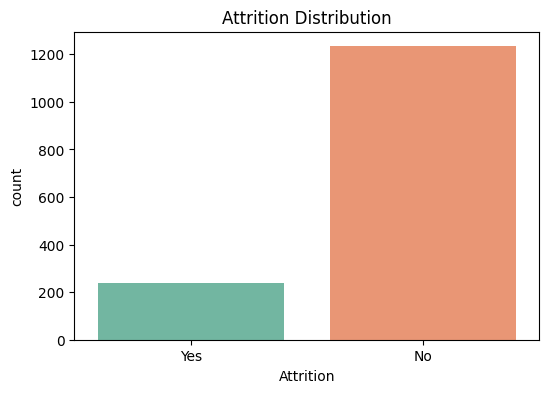

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=hr_df, x="Attrition", palette="Set2")
plt.title("Attrition Distribution")
plt.show()


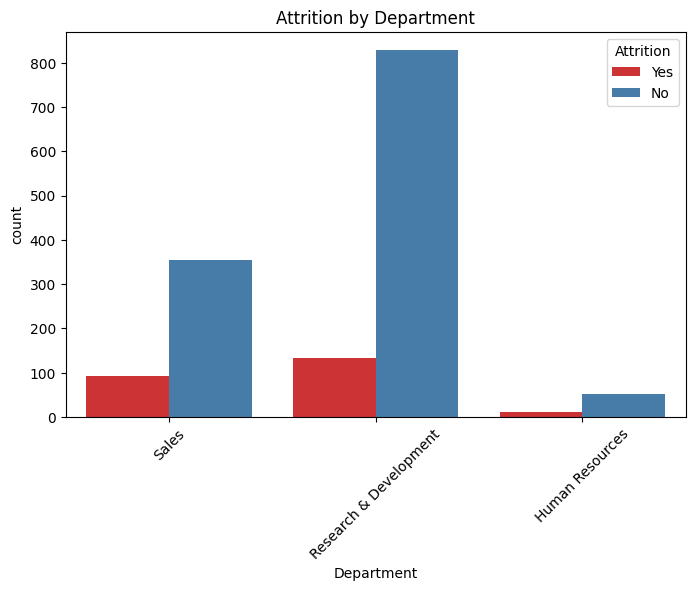

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=hr_df, x="Department", hue="Attrition", palette="Set1")
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()


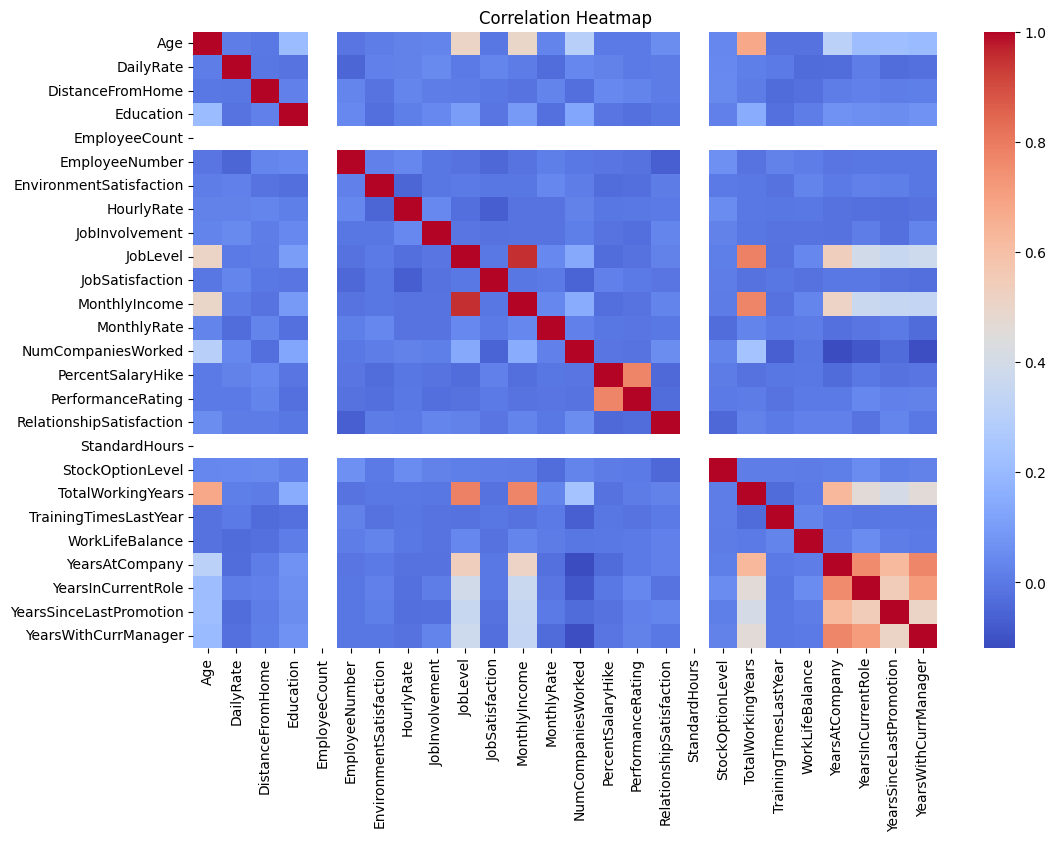

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(hr_df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

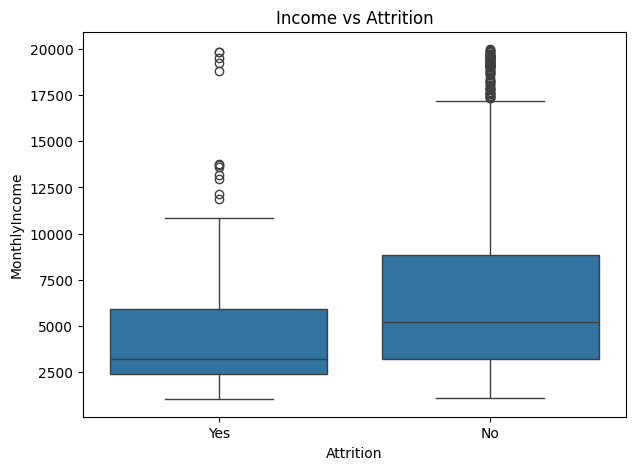

In [7]:
plt.figure(figsize=(7,5))
sns.boxplot(data=hr_df, x="Attrition", y="MonthlyIncome")
plt.title("Income vs Attrition")
plt.show()


### PART B — EDA ON JOB DESCRIPTIONS

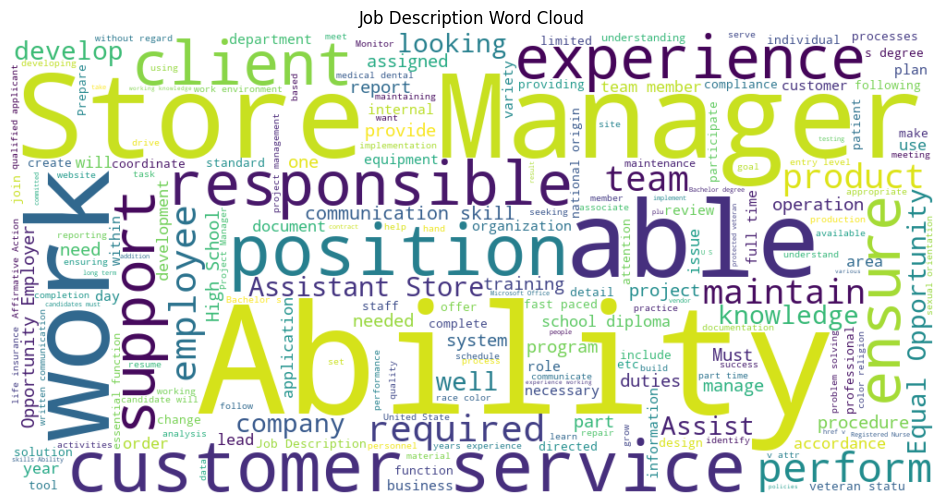

In [8]:
text = " ".join(job_df['clean_description'].dropna())
wc = WordCloud(width=1000, height=500, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Job Description Word Cloud")
plt.show()

In [10]:
if 'title' in job_df.columns:
    plt.figure(figsize=(10,4))
    job_df['title'].value_counts().head(20).plot(kind='bar', color='purple')
    plt.title("Top 20 Job Titles")
    plt.show()

### PART C — EDA ON EMPLOYEE REVIEWS

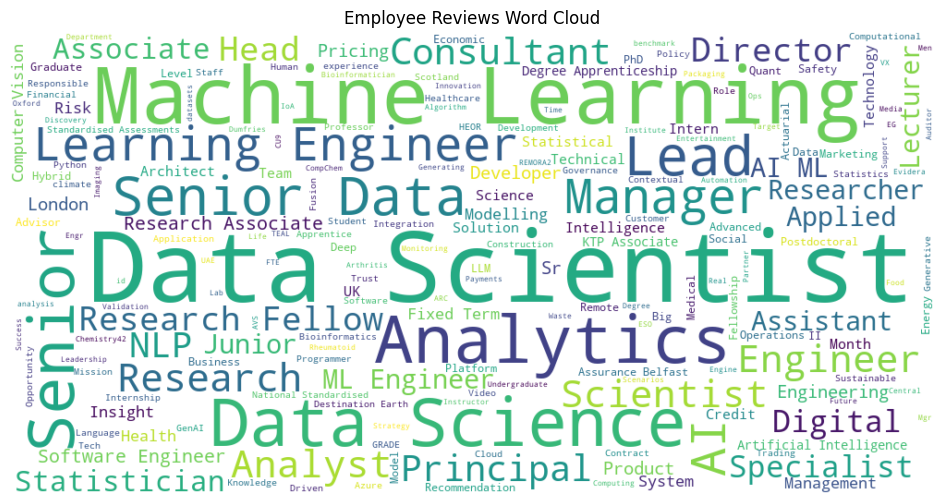

In [11]:
text = " ".join(reviews_df['clean_review'].dropna())
wc = WordCloud(width=1000, height=500, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Employee Reviews Word Cloud")
plt.show()


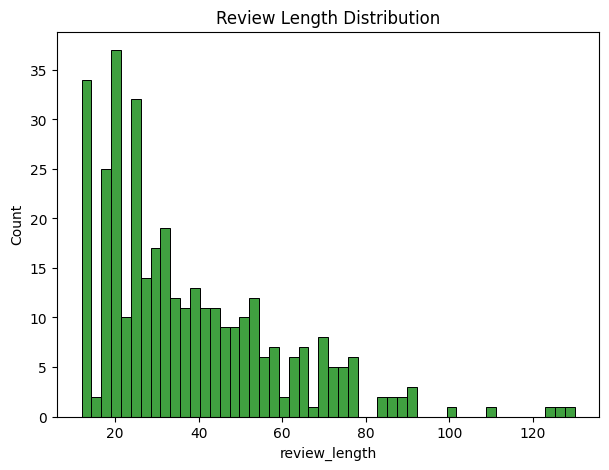

In [12]:
reviews_df['review_length'] = reviews_df['clean_review'].astype(str).apply(len)

plt.figure(figsize=(7,5))
sns.histplot(reviews_df['review_length'], bins=50, color='green')
plt.title("Review Length Distribution")
plt.show()


### PART D — EDA ON RESUMES

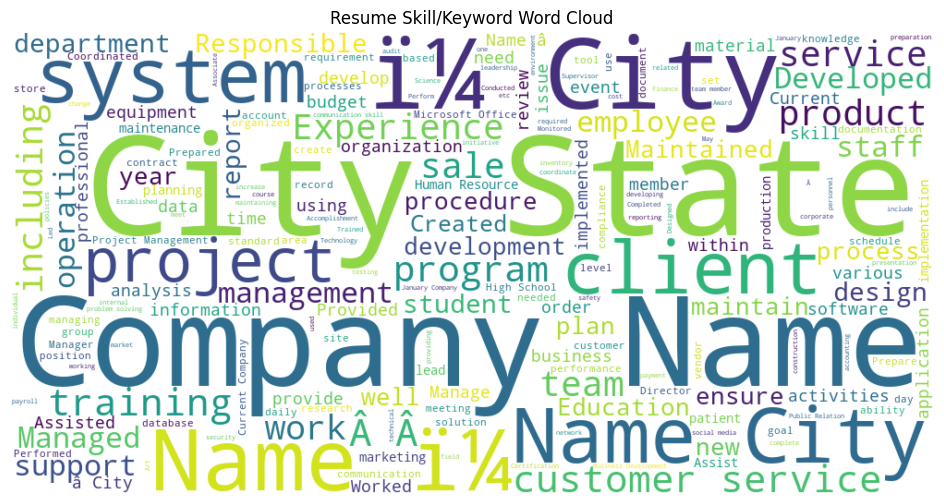

In [13]:
text = " ".join(resumes_df['clean_text'].dropna())
wc = WordCloud(width=1000, height=500, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Resume Skill/Keyword Word Cloud")
plt.show()


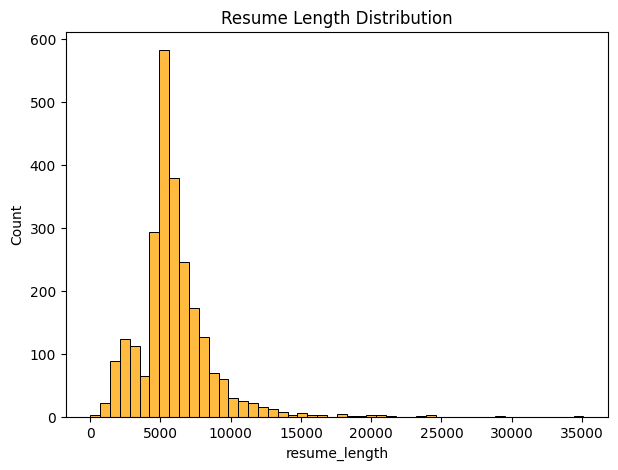

In [14]:
resumes_df['resume_length'] = resumes_df['clean_text'].astype(str).apply(len)

plt.figure(figsize=(7,5))
sns.histplot(resumes_df['resume_length'], bins=50, color='orange')
plt.title("Resume Length Distribution")
plt.show()


### EDA Summary

In [16]:
eda_summary = {
    "hr_shape": hr_df.shape,
    "jobs_shape": job_df.shape,
    "reviews_shape": reviews_df.shape,
    "resumes_shape": resumes_df.shape
}

pd.DataFrame([eda_summary]).to_csv(r"processed/eda_summary.csv", index=False)
